In [9]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
from scipy import stats
import pandas as pd

In [10]:
X1 = pd.read_excel(open('../table.xls', 'rb'), sheet_name='A - aaup')['A5'].to_numpy()
X2 = pd.read_excel(open('../table.xls', 'rb'), sheet_name='A - aaup')['A8'].to_numpy()
bins_number = 11

## $Z = \frac{H - \frac{1}{2}}{\sqrt(\frac{1}{4n})} = 2\sqrt(n)(H - \frac{1}{2})$
## $Z = \frac{1}{\sqrt(2\pi)\sigma}exp(-\frac{(x - \mu)^2}{2\sigma^2})$

In [11]:
stats.wilcoxon(X1, X2)

WilcoxonResult(statistic=0.0, pvalue=4.110515034106515e-177)

In [12]:
def two_sample_chisquare(dist1, dist2, bins=bins_number):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)

In [13]:
two_sample_chisquare(X1, X2)

(153.68768656112596, 0.0)

In [14]:
(max(X1) - min(X1))/11

67.18181818181819

In [15]:
(max(X2) - min(X2))/11

57.63636363636363

In [16]:
min(X1), max(X1)

(270, 1009)

In [17]:
min(X2), max(X2)

(232, 866)

In [18]:
(max(X1) - min(X2))/11

70.63636363636364

In [19]:
stored1 = []
freq1,division1 = np.histogram(X1, bins=bins_number)
for i in range(len(freq1)):
    stored1.append(freq1[i]/len(X1))
    print(freq1[i], round(freq1[i]/len(X1), 3))
division1

28 0.026
118 0.11
227 0.212
277 0.258
171 0.159
123 0.115
80 0.075
31 0.029
7 0.007
7 0.007
4 0.004


array([ 270.        ,  337.18181818,  404.36363636,  471.54545455,
        538.72727273,  605.90909091,  673.09090909,  740.27272727,
        807.45454545,  874.63636364,  941.81818182, 1009.        ])

In [20]:
stored2 = []
freq2,division2 = np.histogram(X2, bins=bins_number)
for i in range(len(freq2)):
    stored2.append(freq2[i]/len(X2))
    print(freq2[i], round(freq2[i]/len(X2), 3))
division2

30 0.028
172 0.16
290 0.27
255 0.238
145 0.135
118 0.11
40 0.037
13 0.012
6 0.006
2 0.002
2 0.002


array([232.        , 289.63636364, 347.27272727, 404.90909091,
       462.54545455, 520.18181818, 577.81818182, 635.45454545,
       693.09090909, 750.72727273, 808.36363636, 866.        ])

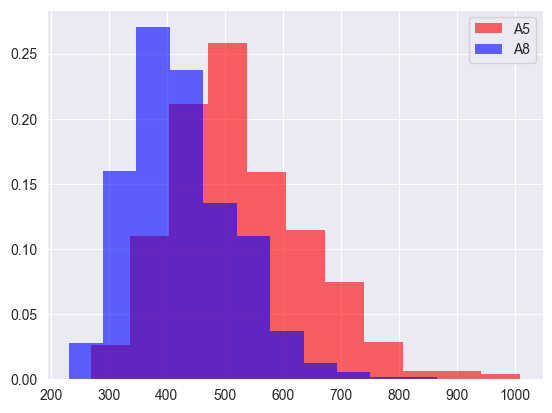

In [21]:
X3, bins3 = np.histogram(X1, bins=bins_number)
plt.stairs(X3 / len(X1), edges=bins3, fill=True, color='red', alpha=0.6, label="A5")
X4, bins4 = np.histogram(X2, bins=bins_number)
plt.stairs(X4 / len(X2), edges=bins4, fill=True, color='blue', alpha=0.6, label="A8")
plt.legend()
plt.show()

In [22]:
stored1

[0.0260950605778192,
 0.10997204100652376,
 0.21155638397017706,
 0.2581547064305685,
 0.15936626281453867,
 0.11463187325256291,
 0.07455731593662628,
 0.028890959925442685,
 0.0065237651444548,
 0.0065237651444548,
 0.003727865796831314]

In [23]:
stored2

[0.027958993476234855,
 0.1602982292637465,
 0.2702702702702703,
 0.23765144454799628,
 0.13513513513513514,
 0.10997204100652376,
 0.03727865796831314,
 0.012115563839701771,
 0.005591798695246971,
 0.001863932898415657,
 0.001863932898415657]

In [24]:
X2 = np.append(X2, X1.max())

In [25]:
X1 = np.append(X1, X2.min())

[7, 78, 186, 288, 207, 143, 102, 41, 11, 7, 4]
[53, 275, 345, 205, 138, 41, 9, 5, 2, 0, 1]
[0.01, 0.07, 0.17, 0.27, 0.19, 0.13, 0.09, 0.04, 0.01, 0.01, 0.0]
[0.05, 0.26, 0.32, 0.19, 0.13, 0.04, 0.01, 0.0, 0.0, 0.0, 0.0]
[232, 302, 373, 443, 514, 585, 655, 726, 797, 867, 938, 1009]
[232, 302, 373, 443, 514, 585, 655, 726, 797, 867, 938, 1009]


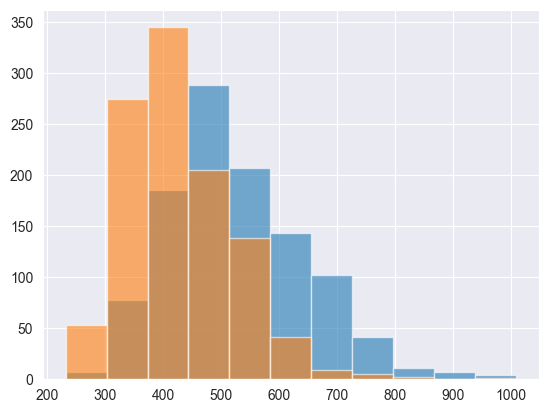

In [26]:
result = plt.hist(X1,  bins=bins_number, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]
values_X = result[1]
result = plt.hist(X2,  bins=bins_number, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]
values_Y = result[1]
relative_freq_X = []
relative_freq_Y = []

for i in range(len(frequencies_X)):
    relative_freq_X.append(round(frequencies_X[i]/len(X1), 2))
    relative_freq_Y.append(round(frequencies_Y[i]/len(X2), 2))
print([int(item) for item in frequencies_X])
print([int(item) for item in frequencies_Y])
print(relative_freq_X)
print(relative_freq_Y)
#print(sum(relative_freq_X)) для проверки
#print(sum(relative_freq_Y)) что сумма относительных частот 1
print([int(item) for item in values_X])
print([int(item) for item in values_Y])

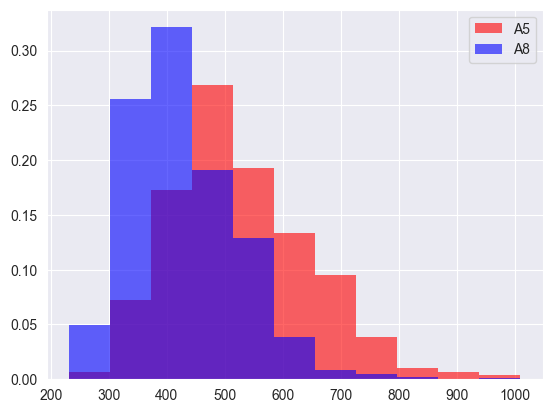

In [27]:
X3, bins3 = np.histogram(X1, bins=bins_number)
plt.stairs(X3 / len(X1), edges=bins3, fill=True, color='red', alpha=0.6, label="A5")
X4, bins4 = np.histogram(X2, bins=bins_number)
plt.stairs(X4 / len(X2), edges=bins4, fill=True, color='blue', alpha=0.6, label="A8")
plt.legend()
plt.show()

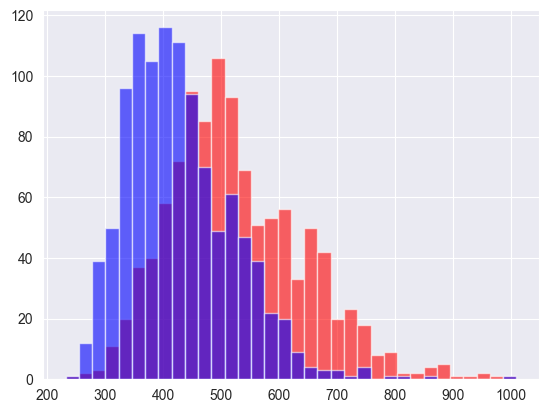

In [28]:
_, bins3 = np.histogram(np.concatenate([X1, X2]), bins='auto')
plt.hist(X1, bins=bins3, fill=True, color='red', alpha=0.6)
plt.hist(X2, bins=bins3, fill=True, color='blue', alpha=0.6)
plt.show()

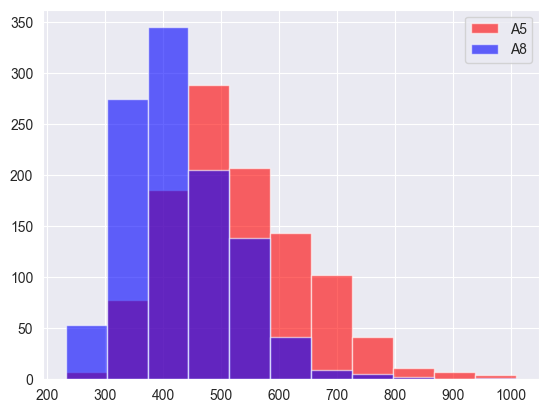

In [44]:
_, bins3 = np.histogram(np.concatenate([X1, X2]), bins=11)
freq1, _, _  = plt.hist(X1, bins=bins3, fill=True, color='red', alpha=0.6, label="A5")
freq2, _, _ = plt.hist(X2, bins=bins3, fill=True, color='blue', alpha=0.6, label="A8")
plt.legend()
plt.show()

In [39]:
freq1, freq2

(array([  7.,  78., 186., 288., 207., 143., 102.,  41.,  11.,   7.,   4.]),
 array([ 53., 275., 345., 205., 138.,  41.,   9.,   5.,   2.,   0.,   1.]))

In [42]:
acc1 = freq1/len(X1)
acc2 = freq2/len(X2)
acc1, acc2

(array([0.00651769, 0.0726257 , 0.17318436, 0.26815642, 0.19273743,
        0.13314711, 0.09497207, 0.03817505, 0.01024209, 0.00651769,
        0.00372439]),
 array([0.04934823, 0.25605214, 0.32122905, 0.19087523, 0.12849162,
        0.03817505, 0.00837989, 0.00465549, 0.0018622 , 0.        ,
        0.0009311 ]))

In [41]:
bins3

array([ 232.        ,  302.63636364,  373.27272727,  443.90909091,
        514.54545455,  585.18181818,  655.81818182,  726.45454545,
        797.09090909,  867.72727273,  938.36363636, 1009.        ])

In [43]:
data = {
    'Номер интервала': list(range(len(bins3) - 1)),
    'Нижняя граница': bins3[:-1],
    'Верхняя граница': bins3[1:],
    'Частота признака 1': freq1,
    'Частота признака 2': freq2,
    'Относит. частота признака 1': acc1,
    'Относит. частота признака 2': acc2
}
df = pd.DataFrame(data)
df.to_excel('bdz3.xlsx')